In [1]:
# pip install pydotplus

In [53]:
#Import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss

#To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

#Increase the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

#View all the dataframe
pd.set_option('display.max_columns',None)


In [43]:
heart_df = pd.read_csv("~/Downloads/heart.csv")

heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA & PROCESSING

In [4]:
#examine information in dataframe
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Check datatypes
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
#examine total Nan values for each column
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#Determine number of unique values for each cloumn
heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

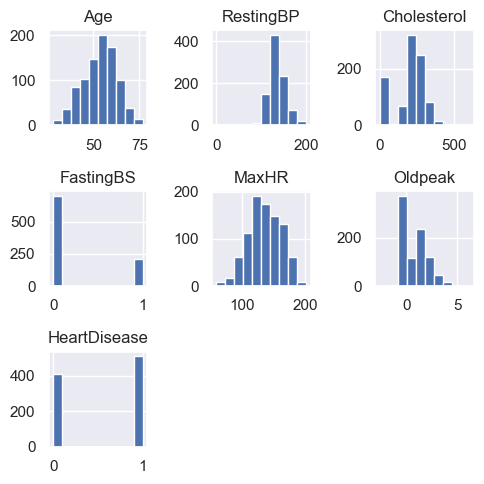

In [47]:
heart_df.hist()
plt.tight_layout()

# Convert file to a csv

In [49]:
heart_df.to_csv(r"./heart_df.csv",index=False)

In [8]:
#Normalize data

new_raw_data = pd.get_dummies(heart_df,columns =['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
new_raw_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [9]:
#Change column names
new_raw_data.rename(columns={'Sex_0': 'Male', 'Sex_1': 'Female','ChestPainType_0':'ChestPainType_ASY','ChestPainType_1':'ChestPainType_ATA','ChestPainType_2':'ChestPainType_NAP','ChestPainType_3':'ChestPainType_TA','RestingECG_0':'RestingECG_LVH','RestingECG_1':'RestingECG_Normal','RestingECG_2':'RestingECG_ST','ExerciseAngina_0':'ExerciseAngina_N','ExerciseAngina_1':'ExerciseAngina_Y','ST_Slope_0':'ST_Slope_Down','ST_Slope_1':'ST_Slope_Flat','ST_Slope_2':'ST_Slope_Up'}, inplace=True)
new_raw_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [10]:
#Look at Heart disease outcome value count
heart_disease_count = new_raw_data['HeartDisease'].value_counts()
heart_disease_count

1    508
0    410
Name: HeartDisease, dtype: int64

In [11]:
#Split data into labels and features
y=new_raw_data['HeartDisease']

X=new_raw_data.drop(columns= ['HeartDisease'])

In [12]:
#Review the y vaviable series
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [13]:
#Review the X variable DataFrame
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [14]:
#Check balance of target heartdisease value
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [15]:
 #Split processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)


In [16]:
#Create standard scaler instance
scaler= StandardScaler()

In [17]:
#Fit the standardScaler with training data
X_scaler = scaler.fit(X_train)

In [18]:
#Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled[0])

[-1.116200 -0.705742 -0.182317 -0.546914 -0.684584 1.586322 -0.521629
 0.521629 0.928948 -0.470423 -0.544812 -0.236886 1.956770 -1.209581
 -0.498296 -1.237350 1.237350 -0.236886 0.983783 -0.884055]


# TRAIN AND EVALUATE

In [19]:
#Create BalancedRandomforestclassifier model

In [20]:
import warnings 
warnings.filterwarnings("ignore")

In [21]:
# Import Dependencies
from imblearn.ensemble import BalancedRandomForestClassifier


# Instantiate the randomforestclassifier model
# Assign a random_state parameter of 1 to the model
classifier_1 = BalancedRandomForestClassifier (n_estimators=100,random_state=1)

# Fit the model using training data
classifier_1.fit(X_train,y_train)

BalancedRandomForestClassifier(random_state=1)

In [22]:
# Make a prediction using the testing data
predictions= classifier_1.predict(X_test)

In [23]:
#Display confused matix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 65,   9],
       [ 10, 100]])

In [24]:
# Evaluate the model with Confusion Matrix and accuracy score
c_matrix = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    c_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

accu_score = accuracy_score(y_test, predictions)


In [25]:
#Generate matrix model
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,65,9
Actual 1,10,100


In [26]:
#calculate balanced score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,predictions)

0.8937346437346437

In [27]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.88      0.91      0.87      0.89      0.80        74
          1       0.92      0.91      0.88      0.91      0.89      0.80       110

avg / total       0.90      0.90      0.89      0.90      0.89      0.80       184



In [28]:
print ("Classification Report")
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        74
           1       0.92      0.91      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



# Optimization #2
changed n_estimator params

In [29]:
# Import Dependencies
from imblearn.ensemble import BalancedRandomForestClassifier


# Instantiate the randomforestclassifier model
# Assign a random_state parameter of 1 to the model
classifier_2 = BalancedRandomForestClassifier (n_estimators=25,random_state=1)

# Fit the model using training data
classifier_2.fit(X_train,y_train)

BalancedRandomForestClassifier(n_estimators=25, random_state=1)

In [30]:
# Make a prediction using the testing data
predictions= classifier_2.predict(X_test)

In [31]:
#Display confused matix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 67,   7],
       [ 10, 100]])

In [32]:
# Evaluate the model with Confusion Matrix and accuracy score
c_matrix = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    c_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

accu_score = accuracy_score(y_test, predictions)


In [33]:
#calculate balanced score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,predictions)

0.9072481572481572

In [34]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.91      0.91      0.89      0.91      0.82        74
          1       0.93      0.91      0.91      0.92      0.91      0.82       110

avg / total       0.91      0.91      0.91      0.91      0.91      0.82       184



In [35]:
print ("Classification Report")
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        74
           1       0.93      0.91      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.91      0.90       184
weighted avg       0.91      0.91      0.91       184



# Optimization #3

In [55]:
#Import dependencie
from sklearn import tree

In [56]:
#Create decision tree classifier instance
model= tree.DecisionTreeClassifier()

In [38]:
#Fit the model
model = model.fit(X_train_scaled, y_train)

In [39]:
#make predictions using model
predictions = model.predict(X_test_scaled)

In [40]:
# Evaluate the model with Confusion Matrix and accuracy score
c_matrix = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    c_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

accu_score = accuracy_score(y_test, predictions)

In [41]:
#display results
print("Confusion Matix")
display (cm_df)
print(f"Accuracy Score:{accu_score}")
print ("Classification Report")
print(classification_report(y_test,predictions))

Confusion Matix


,Predicted 0,Predicted 1
Actual 0,61,13
Actual 1,27,83


Accuracy Score:0.782608695652174
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        74
           1       0.86      0.75      0.81       110

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.80      0.78      0.78       184



In [42]:
# #Create DOT data graph for Desicion Tree ( Not a good model to use)
# dot_data = tree.export_graphviz(
# model, out_file=None, feature_names=X.columns, class_names=["0","1"], filled=True
# )
# #Draw graph 
# graph= pydotplus.graph_from_dot_data(dot_data)
# #show graph
# Image(graph.create_png())

# OPTIMIZATION #3

In [57]:
#Create Logistic regerssion instance
from sklearn.linear_model import LogisticRegression

In [58]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [59]:
#Model evaluation on train data
lr_pred_train = lr_model.predict(X_train)
lr_accuracy_train = accuracy_score(y_train, lr_pred_train)
print(f"Train Accuracy: {round(lr_accuracy_train * 100,2)}%")

Train Accuracy: 86.24%


In [60]:

#TEST DATA
lr_y_pred_test = lr_model.predict(X_test)
lr_accuracy_test = accuracy_score(y_test, lr_y_pred_test)
print(f"Test Accuracy: {round(lr_accuracy_test * 100,2)}%")

Test Accuracy: 90.22%


Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        74
           1       0.91      0.93      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



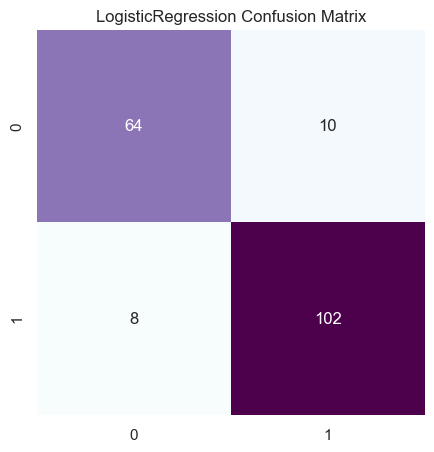

In [61]:
cm = confusion_matrix(y_test, lr_y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False,)
plt.title('LogisticRegression Confusion Matrix');
# Print classification report
print("Classification report: \n{}".format(classification_report(y_test, lr_y_pred_test)))

# Create Visualizations based on RandomForestClassifier model( best accuracy score of 90%)

In [48]:
#Random forest in sklearn will automatically calculate feature importance
importances=classifier_2.feature_importances_

#sort features by their importance
sorted(zip(classifier_2.feature_importances_,X.columns),reverse=True)

[(0.13513719196496654, 'ST_Slope_Up'),
 (0.11035187026244418, 'MaxHR'),
 (0.10439975205886845, 'Cholesterol'),
 (0.0902434114505094, 'ChestPainType_ASY'),
 (0.08825930541527675, 'ST_Slope_Flat'),
 (0.08655092130682784, 'Oldpeak'),
 (0.07537199850348258, 'RestingBP'),
 (0.06856624818025435, 'Age'),
 (0.046661133994804156, 'ExerciseAngina_Y'),
 (0.0423382767742356, 'ExerciseAngina_N'),
 (0.022010062458587602, 'Sex_F'),
 (0.020679849074513108, 'FastingBS'),
 (0.020542837206271605, 'Sex_M'),
 (0.020409329894423404, 'ChestPainType_ATA'),
 (0.01596480098253333, 'ChestPainType_NAP'),
 (0.012372834870956369, 'RestingECG_LVH'),
 (0.011574139263828767, 'ChestPainType_TA'),
 (0.011400805940625756, 'RestingECG_Normal'),
 (0.01016487020988698, 'RestingECG_ST'),
 (0.00700036018670309, 'ST_Slope_Down')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

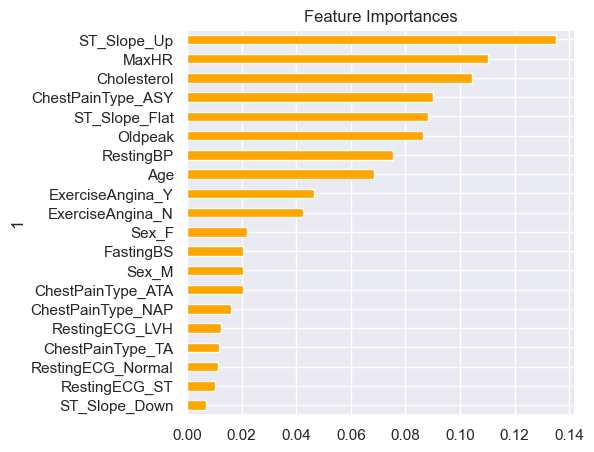

In [50]:
#Visulaize the features by importance
importances_df =pd.DataFrame(sorted(zip(classifier_2.feature_importances_,X.columns),reverse=True))
importances_df.set_index(importances_df[1], inplace= True)
importances_df.drop(columns= 1, inplace= True)
importances_df.rename(columns={0:'Feature Importances'}, inplace= True)
importances_sorted =importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh',color='orange', title='Feature Importances',legend=False)


# Modify or drop some features that aren't necessary and relevant

In [51]:
#Random forest in sklearn will automatically calculate feature importance
importances=classifier_2.feature_importances_

#sort features by their importance
importances_sorted= sorted(zip(classifier_2.feature_importances_,X.columns),reverse=True)
importances_sorted[:10]

[(0.13513719196496654, 'ST_Slope_Up'),
 (0.11035187026244418, 'MaxHR'),
 (0.10439975205886845, 'Cholesterol'),
 (0.0902434114505094, 'ChestPainType_ASY'),
 (0.08825930541527675, 'ST_Slope_Flat'),
 (0.08655092130682784, 'Oldpeak'),
 (0.07537199850348258, 'RestingBP'),
 (0.06856624818025435, 'Age'),
 (0.046661133994804156, 'ExerciseAngina_Y'),
 (0.0423382767742356, 'ExerciseAngina_N')]

In [ ]:
# #Visulaize the features by importance
# importances_df =pd.DataFrame(sorted(zip(classifier_2.feature_importances_,X.columns),reverse=True))
# importances_df.set_index(importances_df[1], inplace= True)
# importances_df.drop(columns= 1, inplace= True)
# importances_df.rename(columns={0:'Feature Importances'}, inplace= True)
# importances_sorted =importances_df.sort_values(by='Feature Importances')
# importances_sorted.plot(kind='barh',color='orange', title='Feature Importances',legend=False)
